In [26]:
import utilities_geopandas as ugp

In [6]:
ugp.splitData(yrbuilt = 2045, by = 'yearly', shpnm = 'parcel_data')

Exported yearly parcel_data in 2045...


for yrbuilt in range(2021, 2046, 1):
    ugp.splitData(yrbuilt = yrbuilt, by = 'yearly')

In [1]:
import utilities_propy as upp

In [4]:
upp.spatialJoin(yrbuilt = 2045, shpnm = 'parcel_data', by = 'yearly')

Processed spatial join for parcel_data by 2045...


for yrbuilt in range(2021, 2046, 1):
    upp.spatialJoin(yrbuilt = yrbuilt, by = 'yearly')

In [2]:
upp.createHeatmap(yrbuilt = "", shpnm = 'parcel_data', field = "jobs")

Created the heatmap for jobs


In [7]:
upp.createHeatmap(yrbuilt = 2045, shpnm = 'parcel_data', field = "jobs", by = "cum")

Created the heatmap for jobs in 2045


In [8]:
upp.createHeatmap(yrbuilt = 2045, shpnm = 'parcel_data', field = "hh", by = "cum")

Created the heatmap for hh in 2045


In [2]:
upp.createHeatmap()

Created the heatmap for jobs in 2021


for yrbuilt in range(2021, 2046, 1):
    for field in ["jobs", "hh"]:
        upp.createHeatmap(yrbuilt, field = field)

In [23]:
yrbuilt = 2037
field = "hh"
fieldName = 'Households'
colormap = 'RdBu_r'

In [9]:
import os, glob
import contextily as ctx
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.ticker import ScalarFormatter
import rasterio
import fiona
from rasterio.plot import show, show_hist
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
path = r'T:\Trans Projects\Model Development\UrbanSim_LandUse\Output\Simulation_47_Final_RTP'

In [24]:
file = os.path.join(path, 'output', "KernelD_" + field + "_" + str(yrbuilt) + ".tif")

In [25]:
src = rasterio.open(file)

In [33]:
type(src)

rasterio.io.DatasetReader

In [26]:
src.shape

(1132, 1799)

In [32]:
src.dtypes

('float32',)

In [28]:
kwargs = src.meta

In [34]:
kwargs

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': -3.4028234663852886e+38,
 'width': 1799,
 'height': 1132,
 'count': 1,
 'crs': CRS.from_epsg(3857),
 'transform': Affine(25.0, 0.0, -13718129.327573707,
        0.0, -25.0, 5490439.4658414265),
 'compress': 'lzw'}

In [31]:
kwargs.update(dtype=rasterio.uint16,
        count=1,
        compress='lzw')

In [20]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

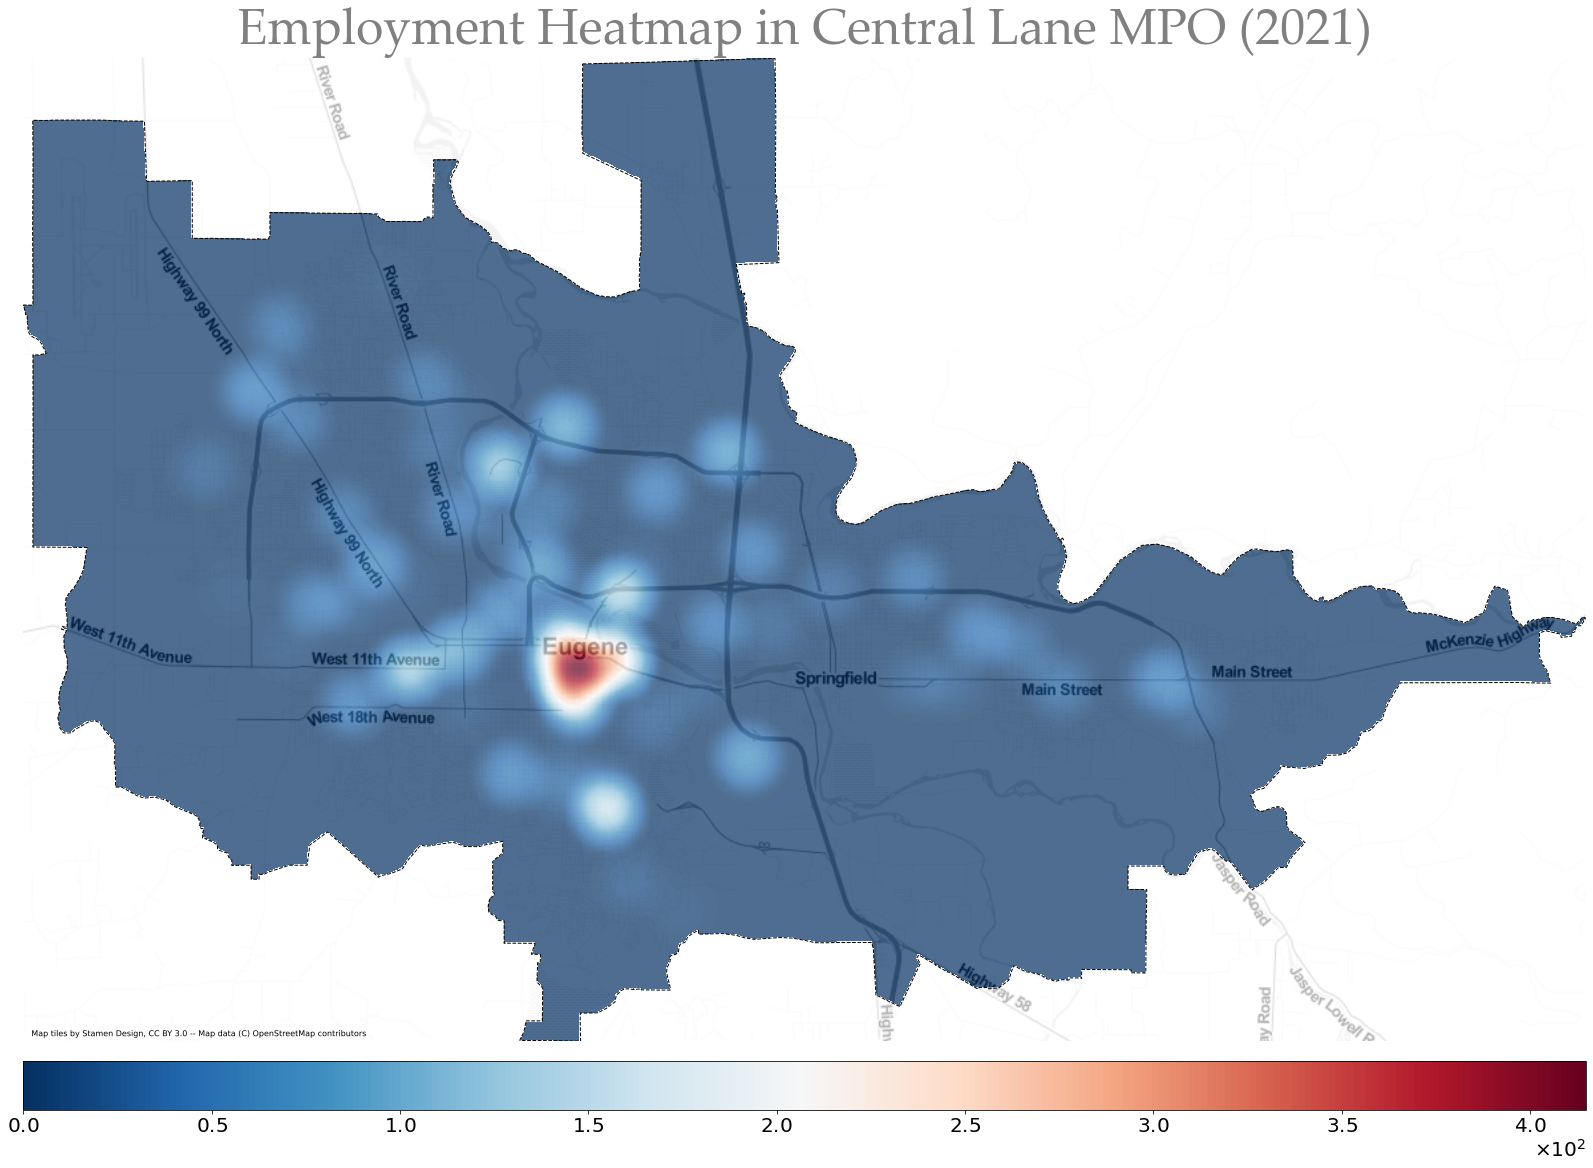

In [21]:
fig, ax = plt.subplots(figsize=(28, 24))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad="2%")

# plot on the same axis with rio.plot.show
data = src.read(1)
ndata = np.where(data == data.min(), np.nan, data)

data_ex = data[data != data.min()]
image = show(ndata, 
                 transform=src.transform, 
                 ax=ax, #alpha=0.7,
                 cmap=colormap)

MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, alpha=0.3)
ax.set_title(fieldName + " Heatmap in Central Lane MPO (" + str(yrbuilt) + ")", fontsize=50, fontname="Palatino Linotype", 
                  color="grey", loc = 'center')

# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(ndata, 
                         cmap=colormap)    

fmt = mpl.ticker.ScalarFormatter(useMathText=True)
fmt.set_powerlimits((0, 0))
cbar = plt.colorbar(image_hidden, format=fmt, ax=ax, cax=cax, orientation="horizontal")

mpl.rcParams.update({'font.size': 20})

ax.axis("off");

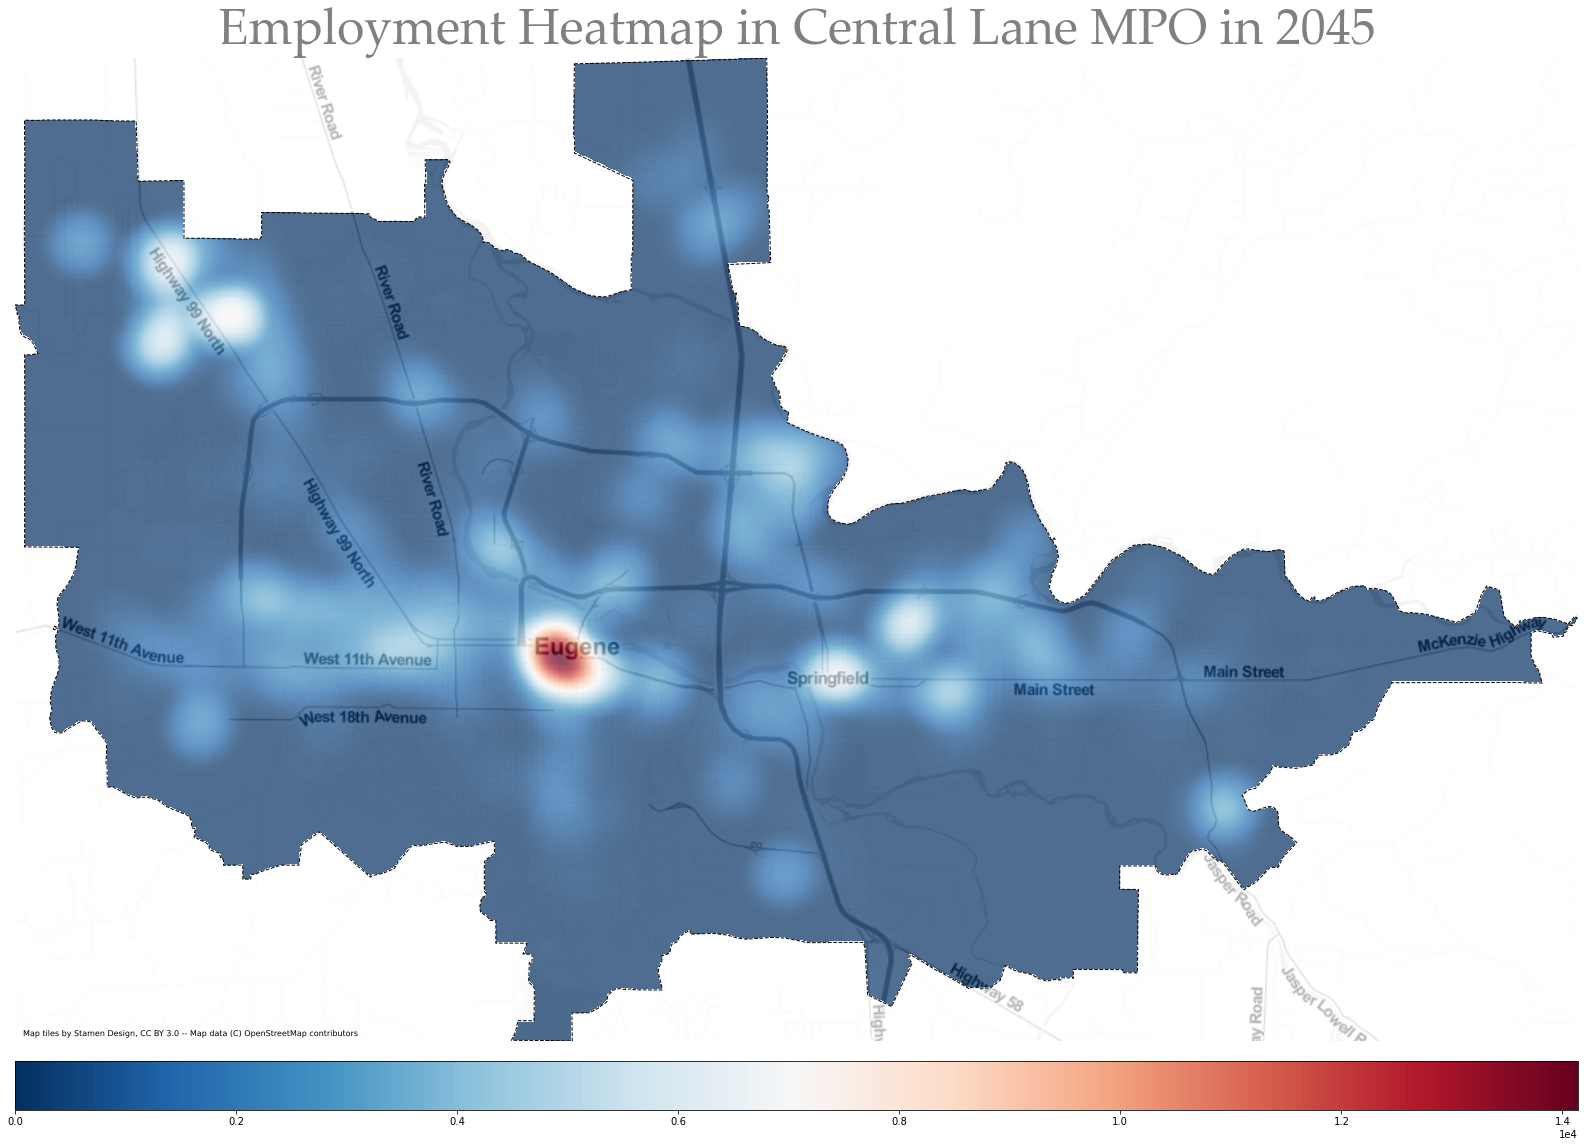

In [2]:
ugp.plotRaster(yrbuilt = "", field = "jobs", fieldName = 'Employment', export = False)

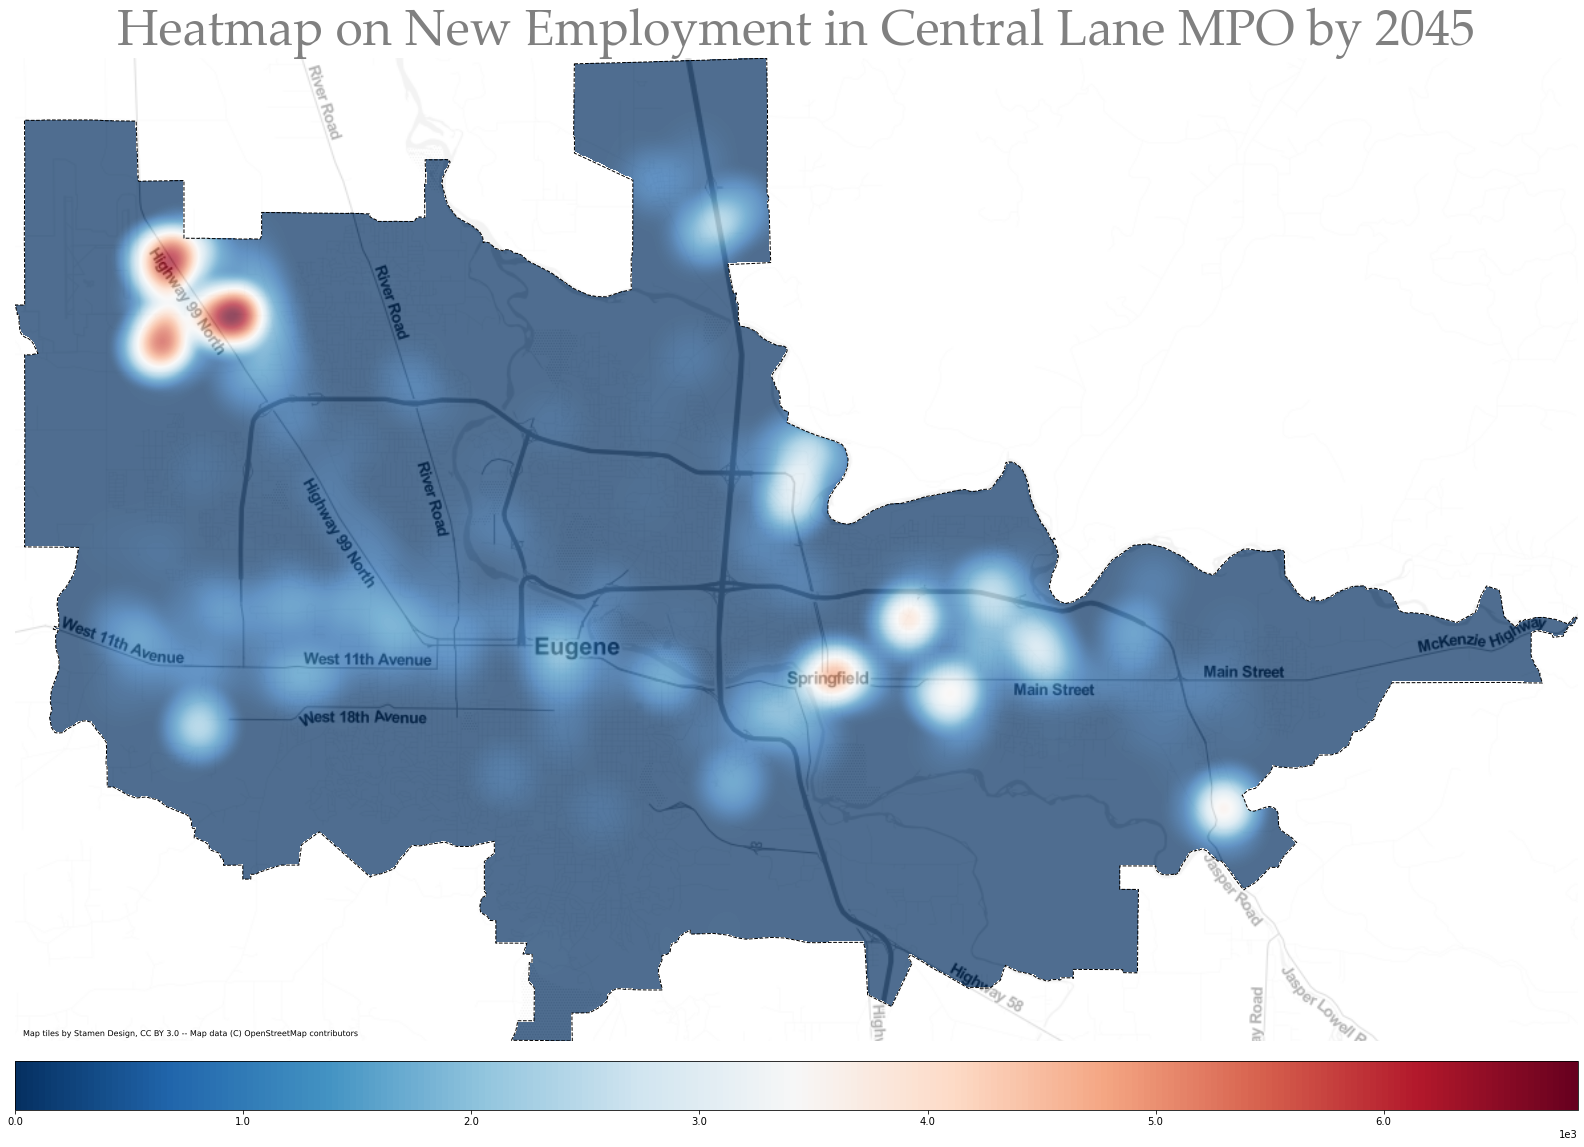

In [2]:
ugp.plotRaster(yrbuilt = 2045, field = "jobs", fieldName = 'Employment', export = False)

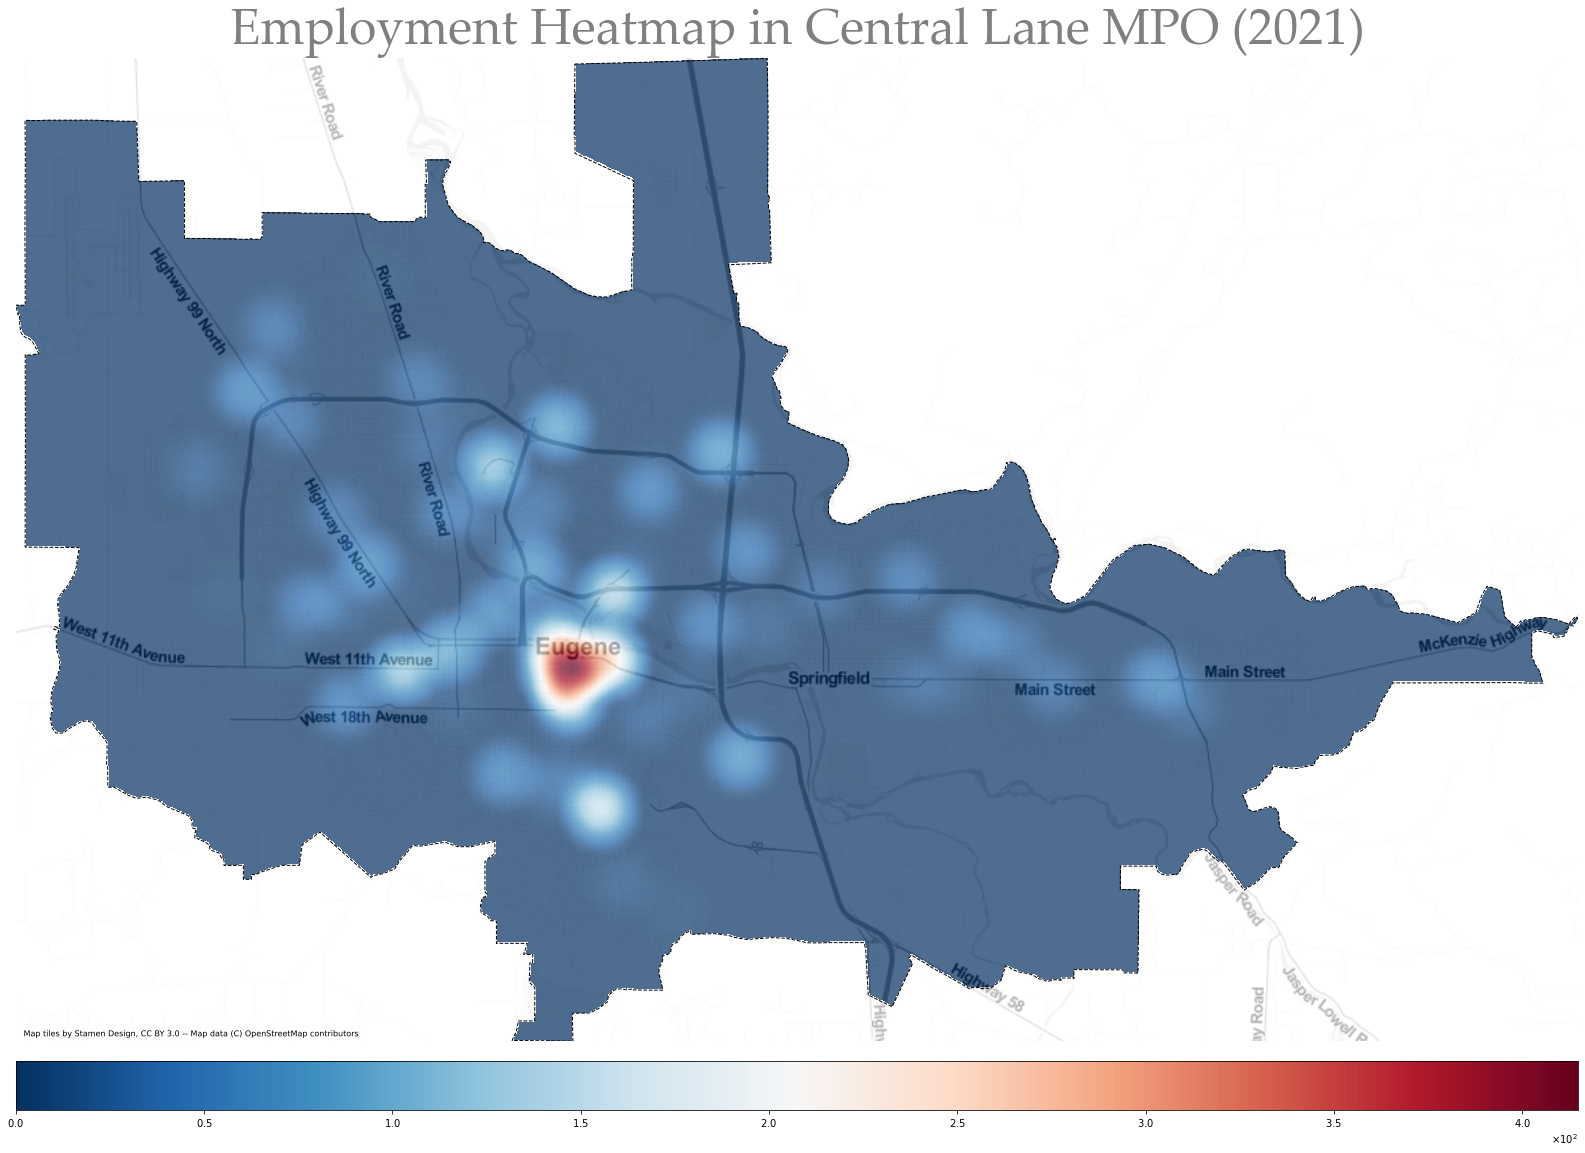

In [3]:
ugp.plotRaster(export = False)

for yrbuilt in range(2021, 2046, 1):
    ugp.plotRaster(yrbuilt = yrbuilt)

for yrbuilt in range(2021, 2046, 1):
    ugp.plotRaster(yrbuilt = yrbuilt, field = "hh", fieldName = 'Households')

In [7]:
yrbuilt = 2022
field = "nnsqft"
fieldName = 'New Non-res SQFT'
colormap = 'RdBu_r'

In [8]:
import os, glob
import contextily as ctx
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.ticker import ScalarFormatter
import rasterio
import fiona
from rasterio.plot import show, show_hist
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
path = r'T:\Trans Projects\Model Development\UrbanSim_LandUse\Output\Simulation_47_Final_RTP'
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")
outpath = r'T:\Models\StoryMap\UrbanSim'

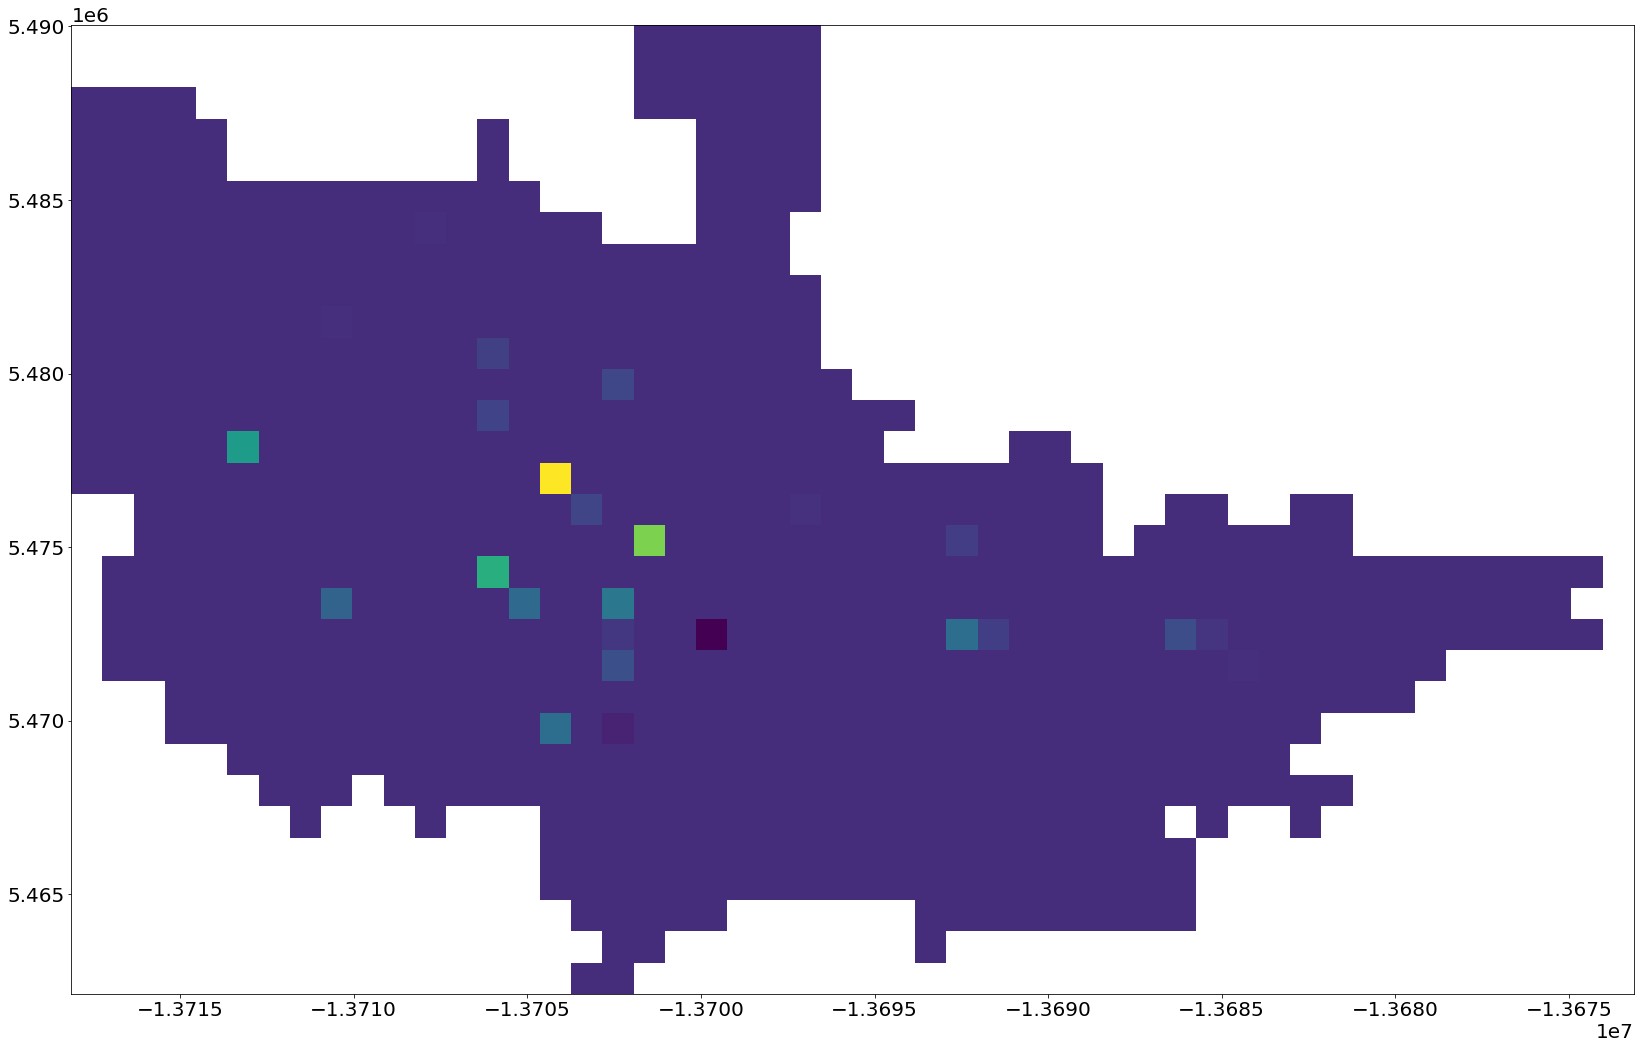

<AxesSubplot:>

In [9]:
file = os.path.join(path, 'output', "KernelD_" + field + "_" + str(yrbuilt) + "_900.tif")
src = rasterio.open(file)
fig, ax = plt.subplots(figsize=(28, 24))
show(src)

for yrbuilt in range(2021, 2046, 1):
    ugp.plotRaster(yrbuilt = yrbuilt, cellSize = 900, export = False)

In [9]:
yrbuilt = 2021
field = 'jobs'

In [10]:
path = r'T:\Trans Projects\Model Development\UrbanSim_LandUse\Output\Simulation_47_Final_RTP'

In [19]:
import os
import geopandas as gpd
import contextily as ctx
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mapclassify
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
newDevTaz = gpd.read_file(os.path.join(path, "output", "parcel_data_taz_" + str(yrbuilt) + ".shp"))

In [12]:
TAZ = gpd.read_file("V:/Data/Transportation/TAZ_Bound.shp")

In [16]:
fieldName = 'Employment'

In [13]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [14]:
min_val, max_val = 0.3,1.0
n = 10
orig_cmap = plt.cm.YlOrRd
colors = orig_cmap(np.linspace(min_val, max_val, n))
cmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)

In [24]:
import pylab as plot
params = {'legend.fontsize': 25, 'legend.handlelength': 2}

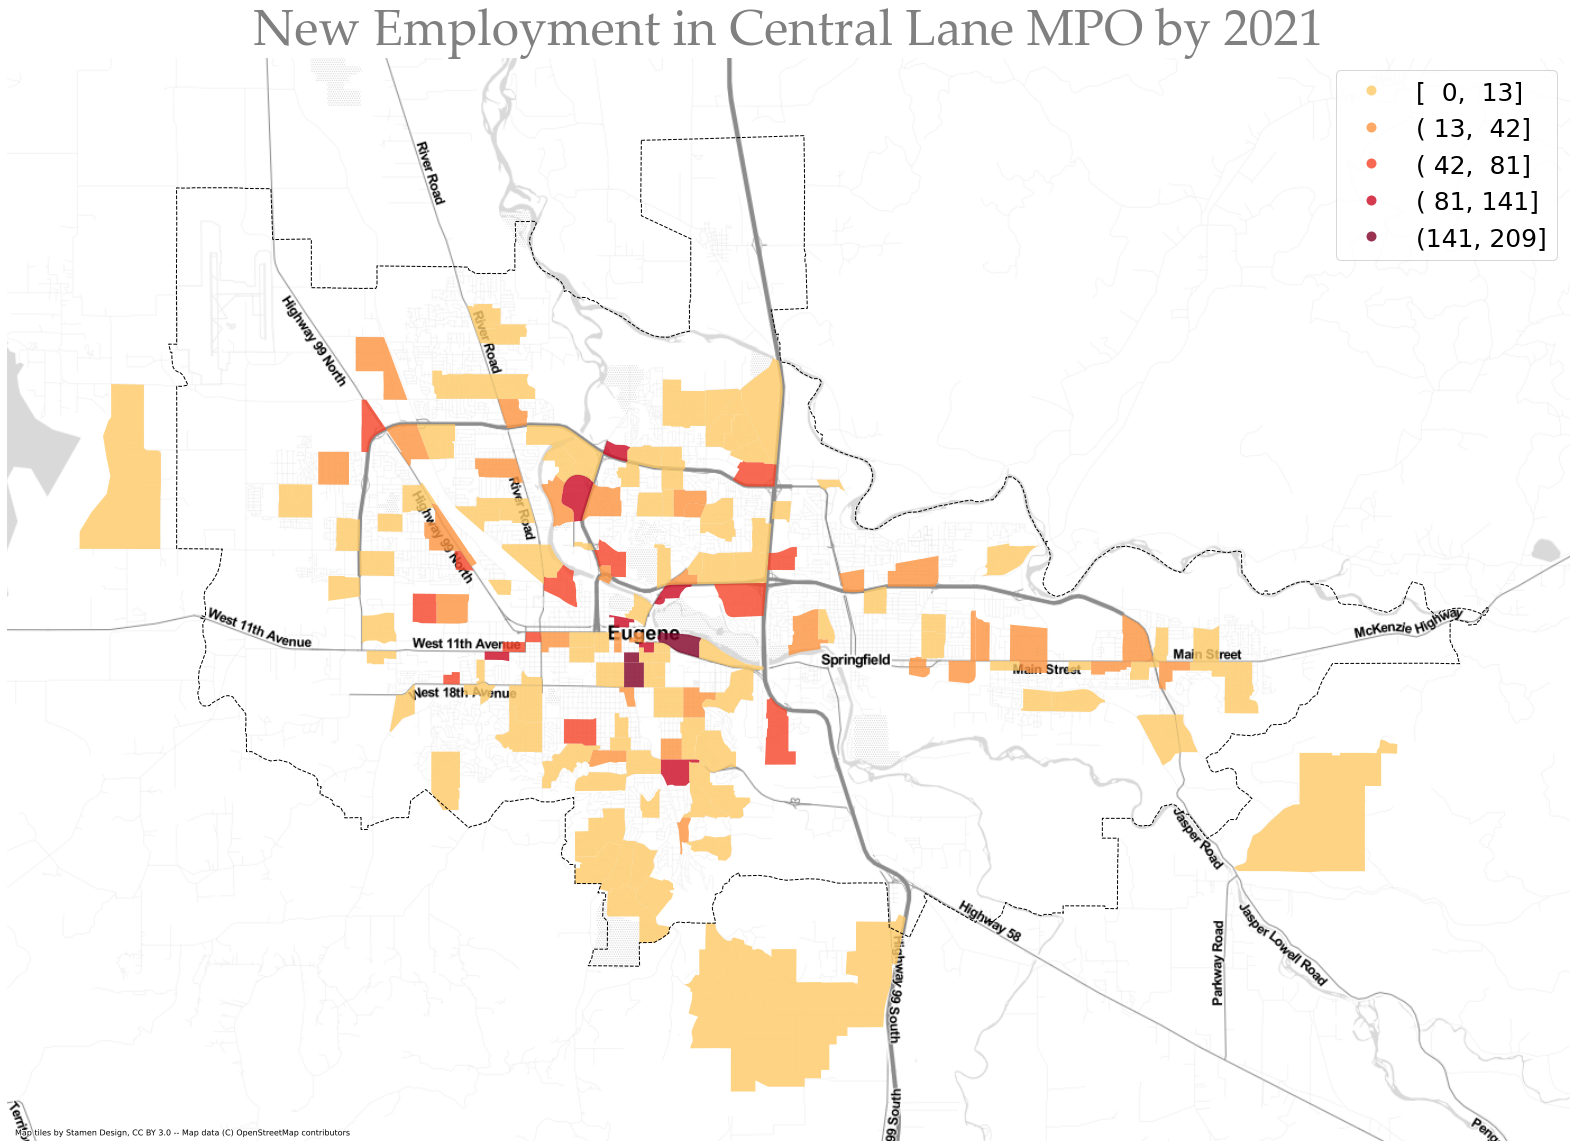

In [25]:
fig, ax = plt.subplots(figsize=(28, 24))
TAZ.plot(ax=ax, facecolor="none", edgecolor="none", alpha=.3, linestyle='--')
plot.rcParams.update(params)
newDevTaz.plot(ax=ax, column=field, cmap=cmap, edgecolor='none',
                       scheme ='naturalbreaks', alpha=.8, #cax=cax,
                       legend=True, legend_kwds={"fmt": "{:.0f}"})
    
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("New {0} in Central Lane MPO by {1}".format(fieldName, str(yrbuilt)), fontsize=50, fontname="Palatino Linotype", 
          color="grey", loc = 'center')
ax.ticklabel_format(style='sci')
ax.axis("off");

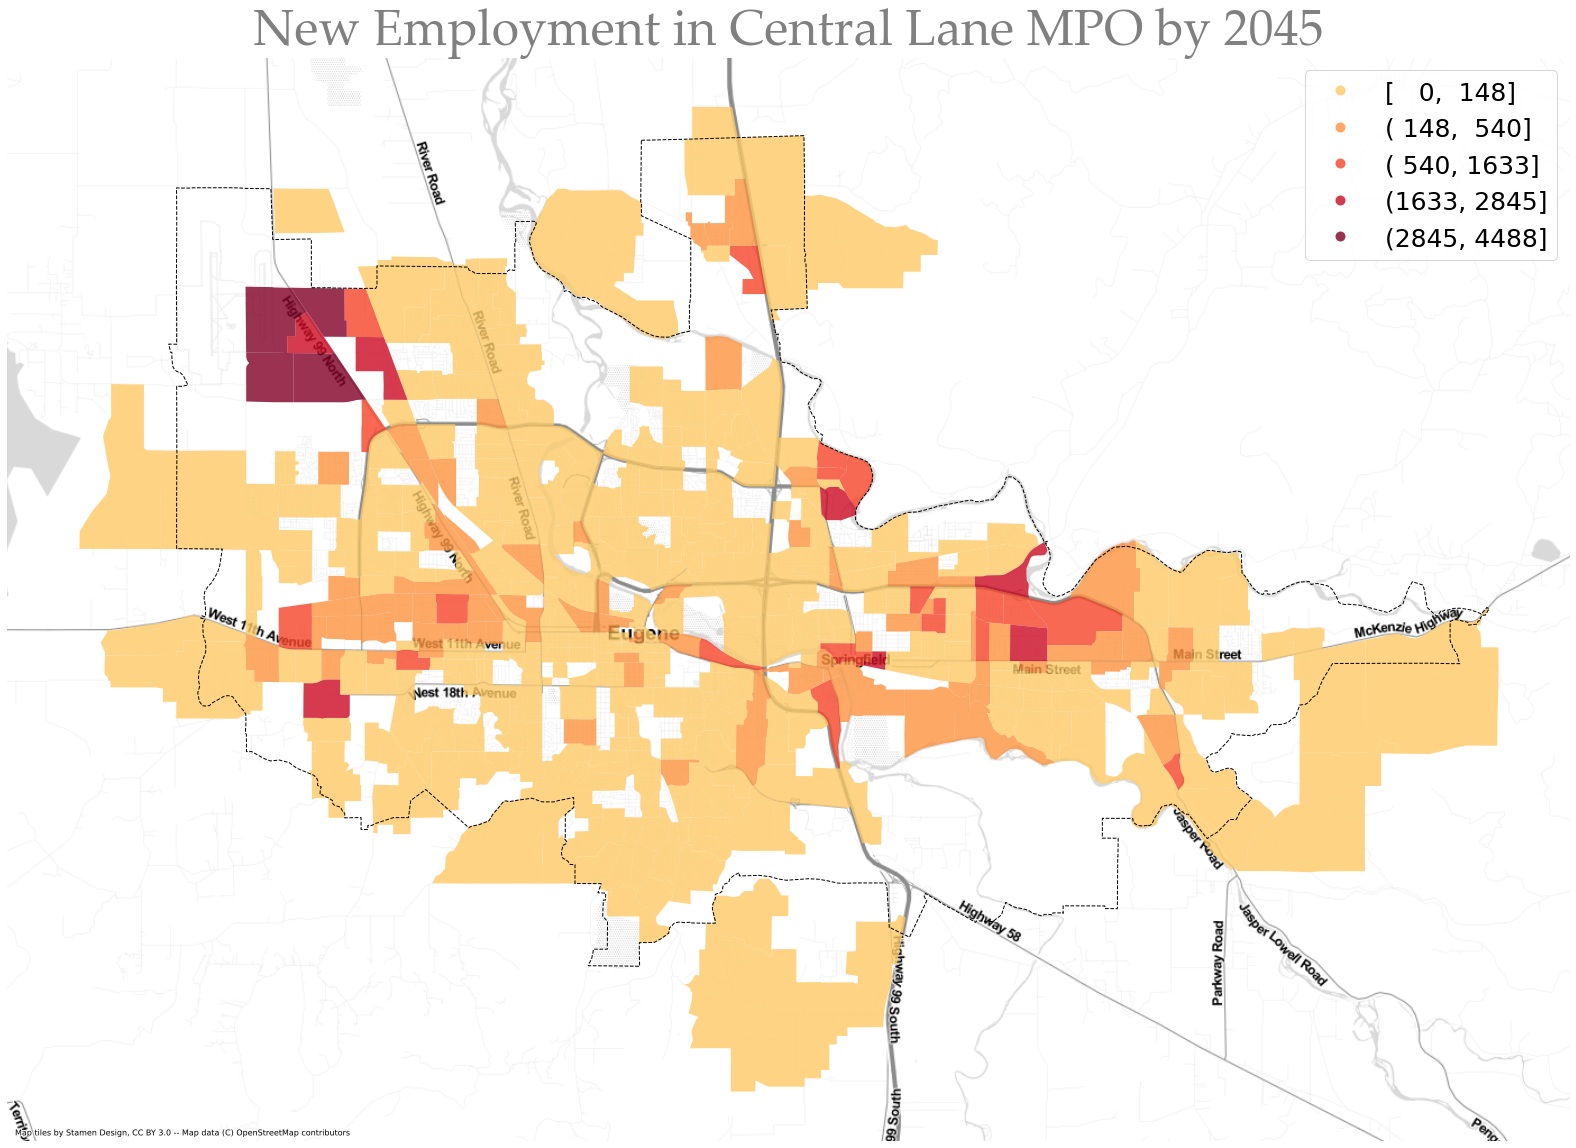

In [27]:
ugp.mapTAZdata(yrbuilt = 2045, export = False)

for yrbuilt in range(2021, 2046, 1):
    ugp.mapTAZdata(yrbuilt = yrbuilt)

for yrbuilt in range(2021, 2046, 1):
    ugp.mapTAZdata(field = 'hh', yrbuilt = yrbuilt)